In [177]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'; 
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn import metrics as skmetrics
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.utils.vis_utils import plot_model

# Load Dataset

In [178]:
train_filename='dataset_training.csv'
df_train=pd.read_csv(train_filename, nrows=4501, header=0,comment='#', na_values=[""])
test_filename='dataset_validation.csv'
df_test=pd.read_csv(test_filename, nrows=1501, header=0,comment='#', na_values=[""])

In [179]:
# Data preparation
X_train = df_train.drop(['target'], axis = 1).values
y_train = df_train['target'].values

print("Input shape (X): {} --- Output shape (y): {}".format(X_train.shape, y_train.shape))

Input shape (X): (4500, 4) --- Output shape (y): (4500,)


In [180]:
# Data preparation
X_validation = df_test.drop(['target'], axis = 1).values
y_validation = df_test['target'].values

print("Input shape (X): {} --- Output shape (y): {}".format(X_validation.shape, y_validation.shape))

Input shape (X): (1500, 4) --- Output shape (y): (1500,)


In [181]:
# Combine Data
X = np.concatenate((X_train, X_validation), axis=0)
Y = np.concatenate((y_train, y_validation), axis=0)
print(X.shape)
print(Y.shape)

(6000, 4)
(6000,)


*Model definition and compile*

In [182]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation = 'relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(3, activation = 'softmax')
])

model.compile(loss= tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ['accuracy'])

c:\Users\madda\Desktop\GUI\venv_new\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Build Starting Network

In [183]:
history=model.fit(X_train, y_train, epochs = 30, batch_size=150, validation_data=(X_validation, y_validation))

Epoch 1/30
30/30 [==============================] - 1s 11ms/step - loss: 1452.2189 - accuracy: 0.3316 - val_loss: 72.7150 - val_accuracy: 0.3707
Epoch 2/30
30/30 [==============================] - 0s 4ms/step - loss: 15.7479 - accuracy: 0.3438 - val_loss: 1.1074 - val_accuracy: 0.3333
Epoch 3/30
30/30 [==============================] - 0s 4ms/step - loss: 1.1017 - accuracy: 0.3333 - val_loss: 1.0991 - val_accuracy: 0.3333
Epoch 4/30
30/30 [==============================] - 0s 4ms/step - loss: 1.0987 - accuracy: 0.3349 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/30
30/30 [==============================] - 0s 4ms/step - loss: 1.0988 - accuracy: 0.3262 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/30
30/30 [==============================] - 0s 4ms/step - loss: 1.0988 - accuracy: 0.3267 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/30
30/30 [==============================] - 0s 4ms/step - loss: 1.0988 - accuracy: 0.3202 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/30
30/

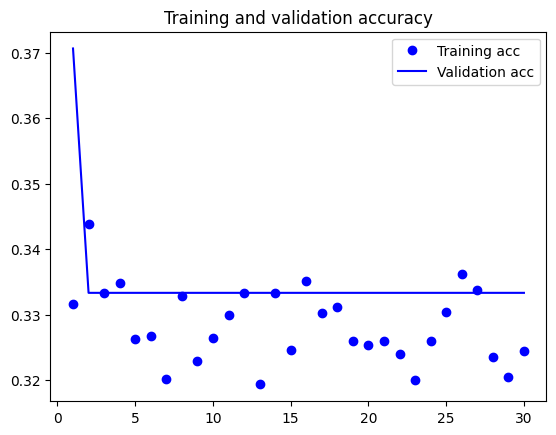

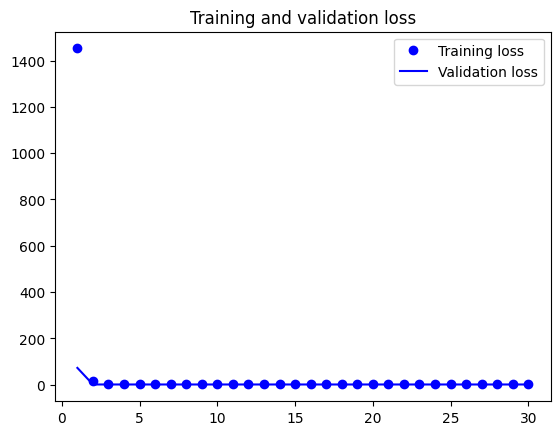

In [184]:
epochs = range(1, 31)

plt.plot(epochs, history.history['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()